# <center>Validating values in NL0000</center>

<b>This notebook validates the values in each visual of the NL0000 (ARC - Non-University Collaboration) Power BI report and provides test cases to determine the accuracy of the report. <br>

Minute differences in values (upto 1 decimal place) can be attributed to the difference in the way these values are rounded in this notebook and Power BI. </b>

# <center>Chapter 1 - Validating values in visuals <a id = "Validating-values-in-visuals"></a></center>

Firstly the data path is defined and and the require python packages have been imported into the notebook.<br>
An image of the Power BI report is also given for reference when ever required.

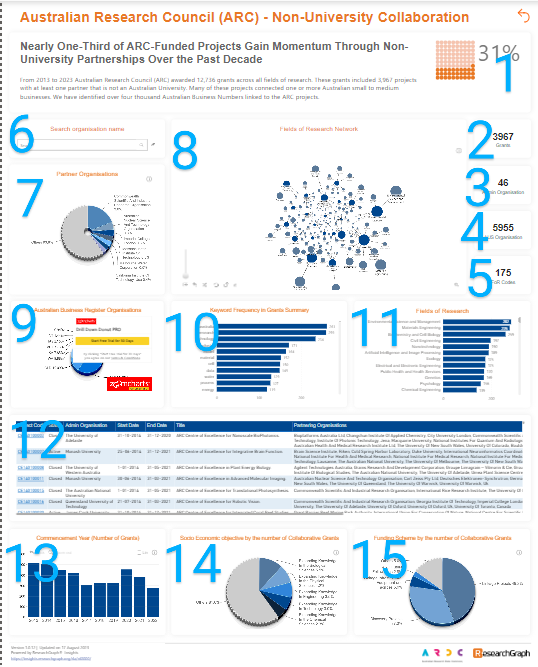

In [1]:
path = './Data/'

import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

image_NL0000 = Image.open(path + 'NL000_image.png')

image_NL0000

# 1.1 Main Insight Value - What percentage of grants have non University Partnership in the last deacde?<a id ="1.1"></a>

Main insight of this report is to show the proportion of non university partnerships in ARC funded projects. <br><br>
From the report close to 31 perecent of ARC funded projects involve non university partnerships. <br><br>
In this section we try to answer the question. What proportion of ARC funded projects have gained momentum through non university Partnerships?

"node_arc_grants" has a list of all the ARC grants inlcuding grants which have a university collaboration and only those that have been granted after and inlcuding those before 2013.

"grant_to_arc_org" contains information which grant went to which organisation.

"node_arc_orgs" contains information about the all organisations inlcuding a unique key, name and local id.

"grants.csv" is created from "node_arc_grants.csv". It only has grants after 2013.

In [2]:
node_arc_grants = pd.read_csv(path + 'node_arc_grants.csv', sep = '|', header = 0)

grant_to_arc_org = pd.read_csv(path + 'grant_to_arc_org.csv', sep = ',', header = 0)

node_arc_orgs = pd.read_csv(path + 'node_arc_orgs.csv', sep = ',', header = 0)

grants = pd.read_csv(path + 'Grant.csv', sep = ',')

For the purpose of validating the main insight, we need to filter out all the non university partners as the source contain information about university partners as well. Hence we merge all the files and then filter out all the non university partners from the resulting data frame.

In [3]:
node_arc_grants.rename(columns = {'key:ID' : 'key'}, inplace = True)

grant_to_arc_org.rename(columns = {'arc_grant_key' : 'key'}, inplace = True)

node_arc_grants['key'] = node_arc_grants['key'].astype(str)

grant_to_arc_org['key'] = grant_to_arc_org['key'].astype(str)

left_table = node_arc_grants.merge(grant_to_arc_org, on = 'key', 
                                   how = 'inner')

In [4]:
node_arc_orgs.rename(columns = {'key:ID' : 'arc_org_key'}, inplace = True)

node_arc_orgs['arc_org_key'] = node_arc_orgs['arc_org_key'].astype(str)

table_for_insight = left_table.merge(node_arc_orgs, on = 'arc_org_key', 
                                     how = 'inner')

In [5]:
table_for_insight_mini = table_for_insight[['key', 'name']]

table_for_insight_mini_non_uni = table_for_insight[table_for_insight['name'].
                                 str.contains('University', case = False) == False]

insight = (len(table_for_insight_mini_non_uni) / len(table_for_insight_mini)) * 100

print("What proportion of ARC funded projects have gained momentum through non university Partnerships? : ",
      str(round(insight)) + " %")

What proportion of ARC funded projects have gained momentum through non university Partnerships? :  31 %


To verifty this result refer to <b>"1"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.2 What are the total number of grants? <a id = "1.2"> </a>

In this section we try to validate the total number of ARC grants that involve non university partnerships. <br><br>
According to the Power BI report, the total number of grants involving non university partnerships is 3967.

In [6]:
table_for_grants = table_for_insight[table_for_insight['name'].
                   str.contains('University', case = False) == False]

"Grant.csv" is created from "node_arc_grants.csv", but Grants.csv only contains information about arc grants after 2013. As we only need grants from the last decade, we will be using this file for futher validation. This is also the same file used to create the Power BI report.

In [7]:
list_grants_Grant_csv = list(grants['key'])

list_grants_node_arc_orgs_csv = list(table_for_grants['key'])

list_missing_grants = []

for key in list_grants_node_arc_orgs_csv:
    if key not in list_grants_Grant_csv:
        list_missing_grants.append(key)
        
left_table_from_grant_csv = grants.merge(grant_to_arc_org, on = 'key', 
                                         how = 'inner')

table_for_grants = left_table_from_grant_csv.merge(node_arc_orgs, on = 'arc_org_key', 
                                                   how = 'inner')

table_for_grants_non_uni = table_for_grants[table_for_grants['name'].
                           str.contains('University', case = False) == False]

print("What are the total number of grants involving non university partnerships? :",
      len(np.array(table_for_grants_non_uni['key'].unique())))

What are the total number of grants involving non university partnerships? : 3967


To verifty this result refer to <b>"2"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.3 What are the total Number of Administering Organisations? <a id = "1.3"></a>

This section validates the number of administering organisations that are not universities. <br><br>
According to the report in power BI there are 46 such organisations. We will be verifying this number in section.

In [8]:
table_for_admin_orgs = table_for_insight[table_for_insight['name'].
                       str.contains('University', case = False) == False]


In [9]:
list_admin_orgs_Grant_csv = list(grants['announcement-administering-organisation'])

list_admin_orgs_node_arc_orgs_csv = list(table_for_admin_orgs['arc_announcement_administering_organisation'])

list_missing_admin_orgs = []

for key in list_admin_orgs_node_arc_orgs_csv:
    if key not in list_admin_orgs_Grant_csv:
        list_missing_admin_orgs.append(key)
        

left_table_from_grant_csv = grants.merge(grant_to_arc_org, on = 'key', 
                                         how = 'inner')

table_for_admin_orgs = left_table_from_grant_csv.merge(node_arc_orgs, on = 'arc_org_key', 
                                                       how = 'inner')

table_for_admin_orgs_non_uni = table_for_admin_orgs[table_for_grants['name'].
                               str.contains('University', case = False) == False]

print("How many non University Admin Organisations are present? :",
      len(np.array(table_for_admin_orgs_non_uni['announcement-administering-organisation'].unique())))

How many non University Admin Organisations are present? : 46


To verifty this result refer to <b>"3"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.4 What are the total number of AUS organisation? <a id = "1.4"></a>

This section gives an information about the number of organisations that are australian. According to the power BI report there are 5955 australian organisations.

In [10]:
node_abr_orgs = pd.read_csv(path + 'node_abr_orgs.csv', sep = '|', 
                            header = 0)

node_abr_orgs_non_uni = node_abr_orgs[node_abr_orgs['name'].
                        str.contains('University', case = False) == False]

print("How many Australian Organisations are Present? :",
      len(np.array(node_abr_orgs_non_uni['name'].unique())))

How many Australian Organisations are Present? : 5955


To verifty this result refer to <b>"4"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.5 What are the total number of Partner Organisations? <a id = "1.5"></a>

This section gives information about the total number of grants for each organisation that is not a university. <br><br>
This data is represented using a donut chart in the Power BI report. <br><br>
We can verify the number of grants for some of the organisations from the list by comparing them with the donut chart in Power BI.

In [11]:
table_for_insight_non_uni = table_for_insight[table_for_insight['name'].str.contains('University', 
                                                                                    case = False) == False]
table_for_insight_partner_orgs = table_for_insight_non_uni[['key', 'name']]

From the list of organisations given below, we can say that there is a match between the results from this notebook and the NL0000 Power BI report. <br><br>
1. Commonwealth scientific and industrial research - 291 Grants. <br><br>
2. Imperial college london - 75 Grants. <br><br>
3. Melbourne water corporation - 50 Grants.

In [12]:
table_for_grants_non_uni = table_for_grants[table_for_grants['name'].str.contains('University', 
                                                                                    case = False) == False]

table_for_grants_partner_orgs = table_for_grants_non_uni[['key', 'name']]

print("This data is from Grants.csv")

table_for_grants_partner_orgs_grouped = table_for_grants_partner_orgs.groupby(['name']).nunique().\
                                        sort_values(['key'], ascending = False)

table_for_grants_partner_orgs_grouped['key'] = \
            round((table_for_grants_partner_orgs_grouped['key'] / table_for_grants_partner_orgs_grouped['key'].sum()) * 100, 1)
    
print(table_for_grants_partner_orgs_grouped)

This data is from Grants.csv
                                                    key
name                                                   
Commonwealth scientific and industrial research...  3.0
Australian nuclear science and technology organ...  0.8
Imperial college london                             0.6
Massachusetts institute of technology               0.5
Melbourne water corporation                         0.5
...                                                 ...
H.j. heinz company australia limited                0.0
Gydle inc                                           0.0
Gwydir shire council                                0.0
Guodian new energy technology research institute    0.0
Landgate                                            0.0

[5458 rows x 1 columns]


To verifty this result refer to <b>"7"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.6 How many Australian Business Register Organisations are present in each state and territory? <a id = "1.6"></a>

In this section we are verifying the number of Australian registered businesses in state and territory of Australia. <br><br>
From the results below we can confirm that the results from notebook match with the Power BI report.

In [13]:
node_abr_orgs_non_uni.groupby(['state'])['key:ID'].nunique()

state
         56
ACT     222
NSW    1886
NT       86
QLD     899
SA      468
TAS     128
VIC    1625
WA      589
Name: key:ID, dtype: int64

To verifty this result refer to <b>"9"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.7 What is the frequency of each keyword in Grant Summary? <a id = "1.7"></a>

Each ARC grant is associated with a keyword. <br><br>
In the Power BI report, the "Keyword Frequency in Grant Summary" visuals lists the frequencies of all these keywords. This is essentially the number of grants which have that particular keyword associated with it. <br><br>
From the table given below we can verify the frequency of each keyword. <br>

<b>**Note : In the Power BI, there is a filter on this visual that eliminates the word "project" from the visual.**

In [14]:
grant_summary = pd.read_csv(path + 'grant_summary(v2).csv', sep = ',', header = 0)

table_for_keyword_summary = table_for_grants_non_uni.merge(grant_summary, on = 'code', how = 'inner')

table_for_keyword_summary_cal = table_for_keyword_summary[['key', 'keywords_by_gensim']]

print(table_for_keyword_summary_cal.groupby(['keywords_by_gensim']).nunique().\
                                        sort_values(['key'], ascending = False).head())

                     key
keywords_by_gensim      
project             1761
australia            261
research             259
technology           234
industry             171


To verifty this result refer to <b>"10"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.8 What are the number of grants for each field of research? <a id = "1.8"></a>

Each ARC grant has a research area in focus. This field of research could be Engineering, Technology, Environmental Sciences etc <br><br>

Each field of research is further divided into sub categories. For instance Environmental Science is divided into six sub categories which are <br>
    1. Enviromental Biotechnology <br>
    2. Soil Sciences <br>
    3. Pollution and Contamination <br>
    4. Ecological Applications <br>
    5. Environmental Science and Management <br>
    6. Other Environmental Sciences <br><br>
    
In this section we verify the number of grants for each of these sub categories in all the categories present in the data.

In [15]:
for_graph = pd.read_csv(path + 'FOR_graph.csv', sep = ',', header = 0)

grant_for = pd.read_csv(path + 'grant_for.csv', sep = ',', header = 0)

grant_for.rename(columns = {'Code' : 'code'}, inplace = True)

for_graph['key'] = for_graph['Type'].map(str) + ':' + '0' + for_graph['TargetCode'].map(str)

left_table_field_research = table_for_grants_non_uni.merge(grant_for, on = 'code', how = 'inner')

left_table_field_research.rename(columns = {'key_y' : 'key'}, inplace = True)

table_for_field_research = left_table_field_research.merge(for_graph, on = 'key', how = 'inner')

In [16]:
table_for_field_research_cal = table_for_field_research[['key_x', 'TargetFOR']]

print(table_for_field_research_cal.groupby(['TargetFOR']).nunique().\
      sort_values(['key_x'], ascending = False).head())

                                              key_x
TargetFOR                                          
Environmental Science and Management            282
Materials Engineering                           275
Biochemistry and Cell Biology                   259
Civil Engineering                               195
Artificial Intelligence and Image Processing    189


To verifty this result refer to <b>"11"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.9 How may FOR Codes are present in the data?<a id = "1.9"></a>

For all the field of research categories and subcategories in the dataset, there is unique identifier called FOR Code. <br><br>
For example, FOR Code for Mathematical Sciences is "01" and FOR Code for Pure Mathematics which is a sub category of Mathematical Sciences is "0101". <br><br>
In this section we verify the number of FOR Codes, which is essentially the cumulative number of categories or sub categories associated with all the grants.

In [17]:
print("How many FOR Codes are present? :",len(np.array(left_table_field_research['key'].unique())))

How many FOR Codes are present? : 175


To verifty this result refer to <b>"5"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.10 What are number of grants in each Year since 2013? <a id = "1.10"></a>

This sections lists out the number of grants funded by ARC which involve a non universit partner for each year from 2013-2023.<br><br>
From the table below we can confirm that the number of grants for all the years match with the numbers in the Power BI report.

In [18]:
table_for_grants_non_uni.groupby(['funding-commencement-year'])['key'].nunique()

funding-commencement-year
2013    515
2014    504
2015    447
2016    420
2017    309
2018    326
2019    328
2020    455
2021    384
2022    279
Name: key, dtype: int64

To verifty this result refer to <b>"13"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.11 What are the number of grants allocated for each Socio Economic Objective? <a id = "1.11"></a>

Every project funded by ARC will have a socio economic objective that the project is intended to acheive. <br><br>
This section lists out number of grants for every socio economic objective.<br><br>
From the table below we can verify that the numbers in the Power BI report are accurate.

In [19]:
socio_economic_objective = pd.read_csv(path + 'socio_economic_objective.csv', sep = ',', header = 0)

socio_economic_objective.rename(columns = {'Grant Code' : 'code', 'Code' : 'key'}, inplace = True)

table_for_socio_economic_objective = table_for_grants_non_uni.merge(socio_economic_objective,
                                                           on = 'code', how = 'inner')

In [20]:
table_for_socio_economic_objective_cal = table_for_socio_economic_objective[['Name', 'key_x']]

table_for_socio_economic_objective_cal = table_for_socio_economic_objective_cal.groupby(['Name']).nunique().\
                                            sort_values(['key_x'], ascending = False)

table_for_socio_economic_objective_cal['key_x'] = round((table_for_socio_economic_objective_cal['key_x'] / 
                                                         table_for_socio_economic_objective_cal['key_x'].sum()) * 100, 1)
    
print(table_for_socio_economic_objective_cal.head())

                                                key_x
Name                                                 
Expanding Knowledge In the Biological Sciences    5.5
Expanding Knowledge In the Physical Sciences      4.2
Expanding Knowledge In Engineering                3.5
Expanding Knowledge In Technology                 3.0
Expanding Knowledge In the Chemical Sciences      2.3


To verifty this result refer to <b>"14"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 1.12 What are number of grants allocated to each funding scheme? <a id = "1.12"></a>

This section validates the number of grants for each scheme name in ARC funded projects.<br><br>
From the below table, we can confirm that the values in Power BI report match with the values in the table.

In [21]:
table_for_funding_scheme_non_uni_non_Grant = table_for_grants_non_uni[['scheme-name', 'key']]

print("This data is from Grants.csv")

table_for_funding_scheme_non_uni_non_Grant_grouped = table_for_funding_scheme_non_uni_non_Grant.groupby(['scheme-name']).\
                        nunique().sort_values(['key'], ascending = False)

table_for_funding_scheme_non_uni_non_Grant_grouped['key'] = round((table_for_funding_scheme_non_uni_non_Grant_grouped['key'] / 
                                                table_for_funding_scheme_non_uni_non_Grant_grouped['key'].sum()) * 100, 1)
    
print(table_for_funding_scheme_non_uni_non_Grant_grouped.head())

This data is from Grants.csv
                                                   key
scheme-name                                           
Linkage Projects                                  49.2
Discovery Projects                                37.0
Linkage Infrastructure, Equipment and Facilities   5.9
ARC Future Fellowships                             2.8
Industrial Transformation Training Centres         1.6


To verifty this result refer to <b>"15"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

 ********************************************************************************************************************************

# <center>Chapter - 2. Test cases based on filtering visuals. <a id = "Test-cases-based-on-filtering-visuals"></a></center>

Now that the numbers on each visual have been verified. Now its time to move onto the next section of this notebook, which is about validating the numbers on all the visuals when a filter is applied to one of them.<br><br>

Power BI provides a functionality of only displaying the information about a selection made on one of the visuals. This information will be validated in section of the report.

<b> NOTE : There may be some visuals on this Power BI report that donot filter some visuals. Only the visuals that are being filter by a selection on a visual will be validated</b>

# 2.1 Seach Box <a id = "2.1"></a>

The NL0000 contains a search box which filter the report on name of the organisation. 
    * For example, if "google" is typed in the search box, all the visuals that have an interaction with the search box will only information about google.<br><br>
Search box filter all the visuals except the following. <br>
    1. Aus Organisation <br>
    2. Australian Registered Business Organisations<br><br>
This section validates the values by perfroming a search on two orgnisations. <br>
    1. google <br>
    2. commonwealth scientific and industrial research organisation <br><br>
    
To search for an Organisation, please use the search box (<b>"6"</b> in the image displayed in <b>Chapter-1. Validating values in visuals</b>) in the report

# 2.1.1 Interaction with Main Insight <a id = "2.1.1"></a>

This section will validate the filtered main insight result, after an organisation names are typed in the search box. <br>
The result of this filter is the proportion of non university collaborations for the searched organisation.

<b> What proportion of ARC funded projects have gained momentum through non university Partnership when "google" is searched for? </b> 

In [22]:

table_for_insight_non_uni = table_for_insight[table_for_insight['name'].str.contains('University',
                                              case = False) == False]

table_for_insight_non_uni_google = table_for_insight_non_uni[table_for_insight_non_uni['name'].str.contains('google',
                                                            case = False)]

grants_google_non_uni = len(np.array(table_for_insight_non_uni_google['key'].unique()))

table_for_insight_uni_google = table_for_insight[table_for_insight['name'].str.contains('google', case = False)]

grants_google_uni = len(np.array(table_for_insight_uni_google['key'].unique()))

insight_google = (grants_google_non_uni / grants_google_uni) * 100

print("What proportion of ARC funded projects have gained momentum through non university Partnerships? : ",
        str(round(insight)) + " %")



What proportion of ARC funded projects have gained momentum through non university Partnerships? :  31 %


To verifty this result refer to <b>"1"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What proportion of ARC funded projects have gained momentum through non university Partnership when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [23]:
table_for_insight_non_uni_csiro = table_for_insight_non_uni[table_for_insight_non_uni['name'].
                                  str.contains('commonwealth scientific and industrial research organisation', case = False)]

grants_csiro_non_uni = len(np.array(table_for_insight_non_uni_csiro['key'].unique()))

table_for_insight_uni_csiro = table_for_insight[table_for_insight['name'].
                               str.contains('commonwealth scientific and industrial research organisation', case = False)]

grants_csiro_uni = len(np.array(table_for_insight_uni_csiro['key'].unique()))

insight_csiro = (grants_csiro_non_uni / grants_csiro_uni) * 100

print("What proportion of ARC funded projects have gained momentum through non university Partnerships? : ",
        str(round(insight)) + " %")

What proportion of ARC funded projects have gained momentum through non university Partnerships? :  31 %


To verifty this result refer to <b>"1"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.2 Interaction with Grants <a id = "2.1.2"></a>

This section will validate the number of grants, after an organisation names are typed in the search box. <br>
The result of this filter is the total number of grants, which are not in collaboration with a university for the searched organisation.

<b>What are the total number of grants when "google" is searched for?</b>

In [24]:
table_for_grants_google = table_for_grants_non_uni[table_for_grants_non_uni['name'].
                                              str.contains('google', case = False)]

print("What are the total number of grants when \"google\" is searched? :",
      len(np.array(table_for_grants_google['key'].unique())))

What are the total number of grants when "google" is searched? : 3


To verifty this result refer to <b>"2"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What total number of grants when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [25]:
table_for_grants_csiro = table_for_grants_non_uni[table_for_grants_non_uni['name'].
                         str.contains('commonwealth scientific and industrial research organisation', 
                         case = False)]

print("What are the total number of grants when \"commonwealth scientific and industrial research organisation\" is searched? :",
      len(np.array(table_for_grants_csiro['key'].unique())))

What are the total number of grants when "commonwealth scientific and industrial research organisation" is searched? : 291


To verifty this result refer to <b>"2"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.3 Interaction with Admin Organisation <a id = "2.1.3"></a>

This section will validate the number of administering organisations, after an organisation names are typed in the search box. <br>
The result of this filter is the total number of grants where the searched organisation has an administering organisation for that particular grant at the time of announcement of the grant.

<b>What are the number of Administering Organisations when "google" is searched for?</b>

In [26]:
table_for_admin_orgs_google = table_for_admin_orgs_non_uni[table_for_admin_orgs_non_uni['name'].
                                                          str.contains('google', case = False)]

print("How many non University Admin Organisations are returned when google is searched? :",
      len(np.array(table_for_admin_orgs_google['announcement-administering-organisation'].unique())))

How many non University Admin Organisations are returned when google is searched? : 3


To verifty this result refer to <b>"3"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of Administering Organisations when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [27]:
table_for_admin_orgs_csiro = table_for_admin_orgs_non_uni[table_for_admin_orgs_non_uni['name'].
                                                          str.contains('commonwealth scientific and industrial research organisation',
                                                                       case = False)]

print("How many non University Admin Organisations are returned when csiro is searched? :",
      len(np.array(table_for_admin_orgs_csiro['announcement-administering-organisation'].unique())))

How many non University Admin Organisations are returned when csiro is searched? : 35


To verifty this result refer to <b>"3"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.4 Interaction with FOR Codes <a id = "2.1.4"></a>

This section will validate the number of FOR codes, after an organisation names are typed in the search box. <br>
The result of this filter is the total count of FOR(Field of Research Codes) that are associated with the organisation that has been searched for.

<b>What are the number of FOR codes when "google" is searched for?</b>

In [28]:
table_for_codes_google = left_table_field_research[left_table_field_research['name'].str.contains('google',
                                                                                                 case = False)]

print("How many FOR Codes are returned when google is searched? :",len(np.array(table_for_codes_google['key'].unique())))

How many FOR Codes are returned when google is searched? : 10


To verifty this result refer to <b>"5"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of FOR codes when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [29]:
table_for_codes_google = left_table_field_research[left_table_field_research['name'].
                         str.contains('commonwealth scientific and industrial research organisation',
                         case = False)]

print("How many FOR Codes are returned when csiro is searched? :",len(np.array(table_for_codes_google['key'].unique())))

How many FOR Codes are returned when csiro is searched? : 94


To verifty this result refer to <b>"5"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.5 Interaction with Partner Organisations <a id = "2.1.5"></a>

This section will validate the partner organisations, after an organisation names are typed in the search box. <br>
The result of this filter is the number of grants in which the organisation that has been searched for is a partner organisation.

<b>What are the partner organisations when "google" is searched for?</b>

In [30]:
table_for_grants_google = table_for_grants_non_uni[table_for_grants_non_uni['name'].
                                                   str.contains('google', case = False)]

table_for_grants_google = table_for_grants_google[['name', 'key']]

table_for_grants_google_grouped = table_for_grants_google.groupby(['name']).nunique()

table_for_grants_google_grouped['key'] = round((table_for_grants_google_grouped['key'] / 
                                                table_for_grants_google_grouped['key'].sum()) * 100, 1)
    
print(table_for_grants_google_grouped.head())

                           key
name                          
Google australia pty ltd  66.7
Google llc                33.3


To verifty this result refer to <b>"7"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the partner organisations when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [31]:
table_for_grants_csiro = table_for_grants_non_uni[table_for_grants_non_uni['name'].
                                                   str.contains('commonwealth scientific and industrial research organisation', 
                                                                case = False)]

table_for_grants_csiro = table_for_grants_csiro[['name', 'key']]

table_for_grants_csiro_grouped = table_for_grants_csiro.groupby(['name']).nunique()

table_for_grants_csiro_grouped['key'] = round((table_for_grants_csiro_grouped['key'] / 
                                                table_for_grants_csiro_grouped['key'].sum()) * 100, 1)
    
print(table_for_grants_csiro_grouped.head())

                                                      key
name                                                     
Commonwealth scientific and industrial research...  100.0


To verifty this result refer to <b>"7"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.6 Interaction with Keyword Frequency in Grants Summary <a id = "2.1.6"></a>

This section will validate the frequency of each keyword in the grant summary, after an organisation names are typed in the search box. <br>
The result of this filter is the total number of times a keyword in repeated from all the grants that are associated with the searched keywords.

<b>What are the list of keyword and their frequencies when "google" is searched for?</b>

In [32]:
table_for_keyword_summary_google = table_for_keyword_summary[table_for_keyword_summary['name'].str.contains('google',
                                                                                                           case = False)]

table_for_keyword_summary_google = table_for_keyword_summary_google[['keywords_by_gensim', 'key']]

print(table_for_keyword_summary_google.groupby(['keywords_by_gensim']).nunique().sort_values(['key'], ascending = False).head())

                    key
keywords_by_gensim     
centre                2
adm                   1
algorithm             1
automated             1
child                 1


To verifty this result refer to <b>"10"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the list of keywords and thier frequencies when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [33]:
table_for_keyword_summary_csiro = table_for_keyword_summary[table_for_keyword_summary['name'].
                                         str.contains('commonwealth scientific and industrial research organisation',
                                         case = False)]

table_for_keyword_summary_csiro = table_for_keyword_summary_csiro[['keywords_by_gensim', 'key']]

print(table_for_keyword_summary_csiro.groupby(['keywords_by_gensim']).nunique().sort_values(['key'], ascending = False).head())

                    key
keywords_by_gensim     
project              97
research             38
technology           25
centre               24
material             24


To verifty this result refer to <b>"10"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.7 Interaction with Fields of Research <a id = "2.1.7"></a>

This section will validate the Fields of Research, after an organisation names are typed in the search box. <br>
The result of this filter is the number of grants in each field of research, that the searched organisation is associated with. <br>
Two or more fields of research can be associated with a single grant. For instance, a single organisation might be working in 10 research field and might only have 3 grants.

<b>What are the number of grants for each field of research when "google" is searched for?</b>

In [34]:
table_for_field_research_google = table_for_field_research[table_for_field_research['name'].str.contains('google',
                                                                                                        case = False)]
table_for_field_research_google = table_for_field_research_google[['key_x', 'TargetFOR']]

print(table_for_field_research_google.groupby(['TargetFOR']).nunique().sort_values(['key_x'], ascending = False))

                                         key_x
TargetFOR                                     
Computation Theory and Mathematics           1
Information Systems                          1
Quantum Physics                              1
Theoretical and Computational Chemistry      1


To verifty this result refer to <b>"11"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of grants for each field of research when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [35]:
table_for_field_research_google = table_for_field_research[table_for_field_research['name'].
                                        str.contains('commonwealth scientific and industrial research organisation',
                                        case = False)]

table_for_field_research_google = table_for_field_research_google[['key_x', 'TargetFOR']]

print(table_for_field_research_google.groupby(['TargetFOR']).nunique().sort_values(['key_x'], ascending = False).head())

                                      key_x
TargetFOR                                  
Oceanography                             31
Environmental Science and Management     31
Materials Engineering                    25
Plant Biology                            23
Atmospheric Sciences                     23


To verifty this result refer to <b>"11"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.8 Interaction with commencement year <a id = "2.1.8"></a>

This section will validate the grants by commencement year, after an organisation names are typed in the search box. <br>
The result of this filter is the number of grants in each year that are undertaken by the searched organisation.

<b>What are the number of grants in each year between 2013 and 2023 when "google" is searched for?</b>

In [36]:
table_for_year_google = table_for_grants_non_uni[table_for_grants_non_uni['name'].str.contains('google',
                                                                                              case = False)]
print(table_for_year_google.groupby(['funding-commencement-year'])['key'].nunique())

funding-commencement-year
2019    1
2020    2
Name: key, dtype: int64


To verifty this result refer to <b>"13"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of grants in each year between 2013 and 2023 when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [37]:
table_for_year_google = table_for_grants_non_uni[table_for_grants_non_uni['name'].
                                                 str.contains('commonwealth scientific and industrial research organisation',
                                                 case = False)]

print(table_for_year_google.groupby(['funding-commencement-year'])['key'].nunique())

funding-commencement-year
2013    41
2014    46
2015    31
2016    32
2017    28
2018    24
2019    22
2020    25
2021    17
2022    25
Name: key, dtype: int64


To verifty this result refer to <b>"13"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.9 Interaction with socio economic objective by number of collaborative grants <a id = "2.1.9"></a>

This section will validate the socio economic objectives, after an organisation names are typed in the search box. <br>
The result of this filter is the number of grants in socio economic objective that the searched orgnisation is working to achieve. <br>
Each grant might be trying to achieve one or more than one socio economic objective.

<b>What are the number of grants for each socio economic objective when "google" is searched for?</b>

In [38]:
table_for_socio_economic_objective_google = table_for_socio_economic_objective[table_for_socio_economic_objective
                                                                               ['name'].str.contains('google', case = False)]

table_for_socio_economic_objective_google = table_for_socio_economic_objective_google[['Name', 'key_x']]

table_for_socio_economic_objective_google_grouped = table_for_socio_economic_objective_google.groupby(['Name']).nunique().\
                                                        sort_values(['key_x'], ascending = False)

table_for_socio_economic_objective_google_grouped['key_x'] = round((table_for_socio_economic_objective_google_grouped['key_x'] / 
                                                table_for_socio_economic_objective_google_grouped['key_x'].sum()) * 100, 1)
    
print(table_for_socio_economic_objective_google_grouped.head())

                                                    key_x
Name                                                     
Child Health                                         11.1
Evaluation of Health Outcomes                        11.1
Expanding Knowledge In Technology                    11.1
Expanding Knowledge In the Chemical Sciences         11.1
Expanding Knowledge In the Information and Comp...   11.1


To verifty this result refer to <b>"14"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of grants for each socio economic objective when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [39]:
table_for_socio_economic_objective_csiro = table_for_socio_economic_objective[table_for_socio_economic_objective['name']
                                            .str.contains('commonwealth scientific and industrial research organisation', 
                                            case = False)]

table_for_socio_economic_objective_csiro = table_for_socio_economic_objective_csiro[['Name', 'key_x']]

table_for_socio_economic_obejctive_grouped_csiro = table_for_socio_economic_objective_csiro.groupby(['Name']).nunique().\
                                                sort_values(['key_x'], ascending = False)

table_for_socio_economic_obejctive_grouped_csiro['key_x'] = round((table_for_socio_economic_obejctive_grouped_csiro['key_x'] / 
                                                table_for_socio_economic_obejctive_grouped_csiro['key_x'].sum()) * 100, 1)
    
print(table_for_socio_economic_obejctive_grouped_csiro.head())

                                                key_x
Name                                                 
Expanding Knowledge In the Biological Sciences    5.7
Expanding Knowledge In the Physical Sciences      4.7
Expanding Knowledge In Engineering                3.7
Expanding Knowledge In the Chemical Sciences      3.5
Expanding Knowledge In Technology                 3.3


To verifty this result refer to <b>"14"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.1.10 Interacting with funding scheme by number of collaborative grants <a id = "2.1.10"></a>

This section will validate the funding scheme, after an organisation names are typed in the search box. <br>
The result of this filter is the number of grants in each funding scheme, that the searched organisation is associated with.

<b>What are the number of grants for each funding scheme when "google" is searched for?</b>

In [40]:
table_for_funding_scheme_google = table_for_grants_non_uni[table_for_grants_non_uni['name'].
                                                           str.contains('google', case = False)]

table_for_funding_scheme_google = table_for_funding_scheme_google[['scheme-name', 'key']]

table_for_funding_scheme_grouped_google = table_for_funding_scheme_google.groupby(['scheme-name']).\
                                                    nunique().sort_values(['key'], ascending = False)

table_for_funding_scheme_grouped_google['key'] = round((table_for_funding_scheme_grouped_google['key'] / 
                                                table_for_funding_scheme_grouped_google['key'].sum()) * 100, 1)
    
print(table_for_funding_scheme_grouped_google.head())

                            key
scheme-name                    
ARC Centres of Excellence  66.7
Discovery Projects         33.3


To verifty this result refer to <b>"15"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of grants for each funding scheme when "commonwealth scientific and industrial research organisation" is searched for?</b>

In [41]:
table_for_funding_scheme_csiro = table_for_grants_non_uni[table_for_grants_non_uni['name'].
                                 str.contains('commonwealth scientific and industrial research organisation',
                                 case = False)]

table_for_funding_scheme_csiro = table_for_funding_scheme_csiro[['scheme-name', 'key']]

table_for_funding_scheme_csiro_grouped = table_for_funding_scheme_csiro.groupby(['scheme-name']).\
                                                    nunique().sort_values(['key'], ascending = False)

table_for_funding_scheme_csiro_grouped['key'] = round((table_for_funding_scheme_csiro_grouped['key'] / 
                                                table_for_funding_scheme_csiro_grouped['key'].sum()) * 100, 1)
    
print(table_for_funding_scheme_csiro_grouped.head())

                                                   key
scheme-name                                           
Discovery Projects                                47.1
Linkage Infrastructure, Equipment and Facilities  17.5
Linkage Projects                                  16.5
Industrial Transformation Training Centres         7.6
ARC Centres of Excellence                          4.1


To verifty this result refer to <b>"15"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2 Fields of Research <a id = "2.2"></a>

NL0000 has a Drill down graph named "Fields of Research". The graph is depicted in such a way that each field of research is connected to its subcategory. For instance, if Chemical Sciences is taken, which is a field of research in the report, it is connected to eight subcategories. The main field of research here, is the parent node and the sub categories are child nodes.
<br><br>

A selection on this graph filter all the visuals except the following: <br>
    1. Search Box <br>
    2. AUS Organisation <br><br>
    
To validate the results of selection on this graph, the following fields of research will be used: <br>
    1. Chemical Sciences (Parent Node) <br>
    2. Astronomical and Space Sciences (Child node of Physical Sciences)
    
<b> To select a field of research, please use the graph(<b>"8"</b> in the image in <b>Chapter-1.Validating values in visuals)</b> in the report.

# 2.2.1 Interaction with Main Insight <a id = "2.2.1"></a>

This section will validate the filtered main insight result, after a field of research name is selected in the graph. <br>
The result of this filter is the proportion of non university collaborations for the selected field of research.

<b>What proportion of ARC funded projects have gained momentum through non university Partnership when "Astronomical and Space Sciences" is selected from the graph?</b>

In [42]:
table_for_insight_as = table_for_field_research[table_for_field_research['TargetFOR'].
                                                str.contains('Astronomical and Space Sciences', case = False)]

table_for_grants_as = table_for_field_research[table_for_field_research['TargetFOR'].
                                                   str.contains('Astronomical and Space Sciences', case = False)]

number_of_grants_as = np.array(table_for_insight_as['key_x'].unique())

table_for_grants_as = table_for_grants_as[table_for_grants_as['TargetFOR'].
                                          str.contains('Astronomical and Space Sciences', case = False)]

total_number_of_grants_as = np.array(table_for_grants_as['key_x'].unique())

insight = (len(number_of_grants_as) / len(total_number_of_grants_as)) * 100

print("What proportion of ARC funded projects have gained momentum through non university Partnerships? : ",
        str(round(insight)) + " %")

What proportion of ARC funded projects have gained momentum through non university Partnerships? :  100 %


To verifty this result refer to <b>"1"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What proportion of ARC funded projects have gained momentum through non university Partnership when "Chemical Sciences" is selected from the graph?</b>

In [43]:
table_for_insight_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                                str.contains('Chemical Sciences', case = False)]

table_for_grants_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                               str.contains('Chemical Sciences', case = False)]

number_of_grants_cs = np.array(table_for_insight_cs['key_x'].unique())

table_for_grants_cs = table_for_grants_cs[table_for_grants_cs['SourceFOR'].
                                          str.contains('Chemical Sciences', case = False)]

total_number_of_grants_cs = np.array(table_for_grants_cs['key_x'].unique())

insight = (len(number_of_grants_cs) / len(total_number_of_grants_cs)) * 100

print("What proportion of ARC funded projects have gained momentum through non university Partnerships? : ",
        str(round(insight)) + " %")

What proportion of ARC funded projects have gained momentum through non university Partnerships? :  100 %


To verifty this result refer to <b>"1"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.2 Interaction with Grants <a id = "2.2.2"></a>

This section will validate the number of grants, after a field of research is selected in the graph. <br>
The result of this filter is the total number of grants, which are not in collaboration with a university for the selected field of research.

<b>What are the total number of grants when "Chemical Sciences" is selected from the graph?</b>

In [44]:
table_for_grants_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                               str.contains('Chemical Sciences', case = False)]

print("What are the total number of grants when \"Chemical Sciences\" is selected on the graph? :",
          len(np.array(table_for_grants_cs['key_x'].unique())))

What are the total number of grants when "Chemical Sciences" is selected on the graph? : 378


To verifty this result refer to <b>"2"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the total number of grants when "Astronomical and Space Sciences" is selected from the graph?</b>

In [45]:
table_for_grants_as = table_for_field_research[table_for_field_research['TargetFOR'].
                                                   str.contains('Astronomical and Space Sciences', case = False)]

print("What are the total number of grants when \"Astronomical and Space Sciences\" is selected on the graph? :",
          len(np.array(table_for_grants_as['key_x'].unique())))

What are the total number of grants when "Astronomical and Space Sciences" is selected on the graph? : 134


To verifty this result refer to <b>"2"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.3 Interaction with Admin Organisations <a id = "2.2.3"></a>

This section will validate the number of administering organisations, after a field of research is selected in the graph. <br>
The result of this filter is the total number of grants where the selected field of research has an administering organisation for that particular grant at the time of announcement of the grant.

<b>What are the number of Administering organisations when "Chemical Sciences" is selected from the graph?</b>

In [46]:
table_for_admin_orgs_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                                   str.contains('Chemical Sciences', case = False)]

print("How many non University Admin Organisations are returned when \"Chemical Sciences\" is selected on the graph? :",
          len(np.array(table_for_admin_orgs_cs['announcement-administering-organisation'].unique())))

How many non University Admin Organisations are returned when "Chemical Sciences" is selected on the graph? : 31


To verifty this result refer to <b>"3"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of Administering organisations when "Astronomical and Space Sciences" is selected from the graph?</b>

In [47]:
table_for_grants_orgs_as = table_for_field_research[table_for_field_research['TargetFOR'].
                                                   str.contains('Astronomical and Space Sciences', case = False)]

print("How many non University Admin Organisations are returned when \"Astronomical and Space Sciences\" is selected on the graph? :",
          len(np.array(table_for_grants_orgs_as['announcement-administering-organisation'].unique())))

How many non University Admin Organisations are returned when "Astronomical and Space Sciences" is selected on the graph? : 17


To verifty this result refer to <b>"3"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.4 Interation with FOR Codes <a id = "2.2.4"></a>

This section will validate the number of FOR codes, after a field of research is selected in the graph. <br>
The result of this filter is the total count of FOR(Field of Research Codes) that are associated with the field of research that has been selected.

<b>What are the number of FOR codes when "Chemical Sciences" is selected from the graph?</b>

In [48]:
table_field_research_for_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                                         str.contains('Chemical Sciences', case = False)]

print("How many FOR Codes are present for \"Chemical Sciences\"? :",
      len(np.array(table_field_research_for_cs['TargetFOR'].unique())))

How many FOR Codes are present for "Chemical Sciences"? : 8


To verifty this result refer to <b>"5"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of FOR codes when "Astronomical and Space Sciences" is selected from the graph?</b>

In [49]:
table_field_research_for_as = table_for_field_research[table_for_field_research['TargetFOR'].
                                                         str.contains('Astronomical and Space Sciences', case = False)]

print("How many FOR Codes are present for \"Astronomical and Space Sciences\"? :",
      len(np.array(table_field_research_for_as['TargetFOR'].unique())))

How many FOR Codes are present for "Astronomical and Space Sciences"? : 1


To verifty this result refer to <b>"5"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.5 Interaction with Partner Organisations <a id = "2.2.5"></a>

This section will validate the partner organisations, after a field of research has been selected on the graph. <br>
The result of this filter is the number of grants in which the field of research that has been selected for is a partner organisation.

<b>What are the partner organisations when "Chemical Sciences" is selected from the graph?</b>

In [50]:
table_for_partner_orgs_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                                   str.contains('Chemical Sciences', case = False)]

table_for_partner_orgs_cs = table_for_partner_orgs_cs[['name', 'key_x']]

table_for_partner_orgs_cs_grouped = table_for_partner_orgs_cs.groupby(['name']).nunique().sort_values(['key_x'], 
                                                                        ascending = False)

table_for_partner_orgs_cs_grouped['key_x'] = round((table_for_partner_orgs_cs_grouped['key_x'] / 
                                                table_for_partner_orgs_cs_grouped['key_x'].sum()) * 100, 1)
    
print(table_for_partner_orgs_cs_grouped.head())

                                                    key_x
name                                                     
Commonwealth scientific and industrial research...    4.6
Australian nuclear science and technology organ...    2.9
The walter and eliza hall institute of medical ...    1.2
Synchrotron light source australia pty ltd            0.8
Imperial college london                               0.8


To verifty this result refer to <b>"7"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the partner organisations when "Astronomical and Space Sciences" is selected from the graph?</b>

In [51]:
table_for_partner_orgs_as = table_for_field_research[table_for_field_research['TargetFOR'].
                                                   str.contains('Astronomical and Space Sciences', case = False)]

table_for_partner_orgs_as = table_for_partner_orgs_as[['name', 'key_x']]

table_for_partner_orgs_as_grouped = table_for_partner_orgs_as.groupby(['name']).nunique().sort_values(['key_x'], 
                                                                        ascending = False)

table_for_partner_orgs_as_grouped['key_x'] = round((table_for_partner_orgs_as_grouped['key_x'] / 
                                                table_for_partner_orgs_as_grouped['key_x'].sum()) * 100, 1)
    
print(table_for_partner_orgs_as_grouped.head())

                                                    key_x
name                                                     
Australian astronomical observatory                  12.6
Commonwealth scientific and industrial research...    8.5
California institute of technology, usa               5.3
Massachusetts institute of technology                 3.2
Max planck institute for radio astronomy              2.8


To verifty this result refer to <b>"7"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.6 Interaction with Keyword Frequency in Grants Summary <a id = "2.2.6"></a>

This section will validate the frequency of each keyword in the grant summary, after a field of research has been selected on the graph. <br>
The result of this filter is the total number of times a keyword in repeated from all the grants that are associated with the field of research.

<b>What are the keywords and thier frequencies when "Chemical Sciences" is selected from the graph?</b>

In [52]:
table_for_keyword_summary_graph = table_for_field_research.merge(grant_summary, on = 'code', how = 'inner')

table_for_keyword_summary_cs = table_for_keyword_summary_graph[table_for_keyword_summary_graph['SourceFOR']
                                                               .str.contains('Chemical Sciences', case = False)]

table_for_keyword_summary_cs = table_for_keyword_summary_cs[['keywords_by_gensim', 'key_x']]

print(table_for_keyword_summary_cs.groupby(['keywords_by_gensim']).nunique().\
      sort_values(['key_x'], ascending = False).head())

                    key_x
keywords_by_gensim       
project               161
material               50
research               35
energy                 32
cell                   29


To verifty this result refer to <b>"10"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the keywords and thier frequencies when "Astronomical and Space Sciences" is selected from the graph?</b>

In [53]:
table_for_keyword_summary_as = table_for_keyword_summary_graph[table_for_keyword_summary_graph['TargetFOR']
                                            .str.contains('Astronomical and Space Sciences', case = False)]

table_for_keyword_summary_as = table_for_keyword_summary_as[['keywords_by_gensim', 'key_x']]

print(table_for_keyword_summary_as.groupby(['keywords_by_gensim']).nunique().\
      sort_values(['key_x'], ascending = False).head())

                    key_x
keywords_by_gensim       
project                57
telescope              20
galaxy                 20
wave                   19
universe               16


To verifty this result refer to <b>"10"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.7 Interaction with Fields of Research <a id = "2.2.7"></a>

This section will validate the Fields of Research, after a field of research has been selected on the graph. <br>
The result of this filter is the number of grants in each field of research, that the broader field of research is associated with. <br>
A parent field of research, like technology, might have many child fields. When a child node is selected in the graph, the field of research visual in the Power BI report, will only show a single bar.

<b>What are the number of grants for each field of research when "Chemical Sciences" is selected from the graph?</b>

In [54]:
table_field_research_field_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                                         str.contains('Chemical Sciences', case = False)]

table_field_research_field_cs = table_field_research_field_cs[['key_x', 'TargetFOR']]

print(table_field_research_field_cs.groupby(['TargetFOR']).nunique().\
      sort_values(['key_x'], ascending = False).head())

                                        key_x
TargetFOR                                    
Physical Chemistry (Incl. Structural)     115
Macromolecular and Materials Chemistry    106
Medicinal and Biomolecular Chemistry       76
Analytical Chemistry                       57
Other Chemical Sciences                    51


To verifty this result refer to <b>"11"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of grants for each field of research when "Astronomical and Space Sciences" is selected from the graph?</b>

In [55]:
table_field_research_field_as = table_for_field_research[table_for_field_research['TargetFOR'].
                                                         str.contains('Astronomical and Space Sciences', case = False)]

table_field_research_field_as = table_field_research_field_as[['key_x', 'TargetFOR']]

print(table_field_research_field_as.groupby(['TargetFOR']).nunique().sort_values(['key_x'], ascending = False))

                                 key_x
TargetFOR                             
Astronomical and Space Sciences    134


To verifty this result refer to <b>"11"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.8 Interaction with Commencement Year <a id = "2.2.8"></a>

This section will validate the grants by commencement year, after a field of research is selected in the graph.<br>
The result of this filter is the number of grants in each year that are undertaken in the selected field of research.

<b>What are the number of grants in each year when "Chemical Sciences" is selected from the graph?</b>

In [56]:
table_for_year_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                             str.contains('Chemical Sciences', case = False)]

print(table_for_year_cs.groupby(['funding-commencement-year'])['key_x'].nunique())

funding-commencement-year
2013    50
2014    51
2015    35
2016    38
2017    40
2018    32
2019    33
2020    38
2021    40
2022    21
Name: key_x, dtype: int64


To verifty this result refer to <b>"13"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of grants in each year when "Astronomical and Space Sciences" is selected from the graph?</b>

In [57]:
table_for_year_cs = table_for_field_research[table_for_field_research['TargetFOR'].
                                             str.contains('Astronomical and Space Sciences', case = False)]

print(table_for_year_cs.groupby(['funding-commencement-year'])['key_x'].nunique())

funding-commencement-year
2013    13
2014    17
2015    16
2016    19
2017    16
2018    11
2019     8
2020    12
2021    13
2022     9
Name: key_x, dtype: int64


To verifty this result refer to <b>"13"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.9 Interaction with Socio Economic Objective by Collaborative Grants <a id = "2.2.9"></a>

This section will validate the socio economic objectives, after a field of research is selected in the graph. <br>
The result of this filter is the number of grants in socio economic objective that the selected field of research is working to achieve. <br>
Each grant might be trying to achieve one or more than one socio economic objective.

<b>What are the number of grants for each socio economic objective when "Chemical Sciences" is selected from the graph?</b>

In [58]:
left_table_for_socio_economic_objective_field = table_for_socio_economic_objective.merge(grant_for, 
                                                                        on = 'code', how = 'inner')

table_for_socio_economic_objective_field = left_table_for_socio_economic_objective_field.merge(for_graph, 
                                                                        on = 'key', how = 'inner')

In [59]:
table_for_socio_economic_objective_field_cs = table_for_socio_economic_objective_field[
                                            table_for_socio_economic_objective_field['SourceFOR']
                                            .str.contains('Chemical Sciences', case = False)]

table_for_socio_economic_objective_field_cs = table_for_socio_economic_objective_field_cs[['Name', 'key_x']]

table_for_socio_economic_objective_field_cs_grouped = table_for_socio_economic_objective_field_cs.groupby(['Name']).nunique().\
                                                          sort_values(['key_x'], ascending = False)

table_for_socio_economic_objective_field_cs_grouped['key_x'] = round((table_for_socio_economic_objective_field_cs_grouped['key_x'] / 
                                                    table_for_socio_economic_objective_field_cs_grouped['key_x'].sum()) * 100, 1)
    
print(table_for_socio_economic_objective_field_cs_grouped.head())

                                                key_x
Name                                                 
Expanding Knowledge In the Chemical Sciences     18.2
Expanding Knowledge In the Biological Sciences    8.2
Expanding Knowledge In the Physical Sciences      4.5
Expanding Knowledge In Technology                 4.1
Expanding Knowledge In Engineering                3.5


To verifty this result refer to <b>"14"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of grants for each socio economic objective when "Astronomical and Space Sciences" is selected from the graph?</b>

In [60]:
table_for_socio_economic_objective_field_as = table_for_socio_economic_objective_field[
                                            table_for_socio_economic_objective_field['TargetFOR']
                                            .str.contains('Astronomical and Space Sciences', case = False)]

table_for_socio_economic_objective_field_as = table_for_socio_economic_objective_field_as[['Name', 'key_x']]

table_for_socio_economic_objective_field_as_grouped = table_for_socio_economic_objective_field_as.groupby(['Name']).nunique().\
                                                        sort_values(['key_x'], ascending = False)

table_for_socio_economic_objective_field_as_grouped['key_x'] = round((table_for_socio_economic_objective_field_as_grouped['key_x'] / 
                                                    table_for_socio_economic_objective_field_as_grouped['key_x'].sum()) * 100, 1)
    
print(table_for_socio_economic_objective_field_as_grouped.head())

                                                    key_x
Name                                                     
Expanding Knowledge In the Physical Sciences         51.3
Expanding Knowledge In Technology                    11.1
Scientific Instruments                                6.4
Expanding Knowledge In Engineering                    6.0
Expanding Knowledge In the Information and Comp...    4.3


To verifty this result refer to <b>"14"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

# 2.2.10 Funding Scheme by Number of Collaborative Grants <a id = "2.2.10"></a>

This section will validate the funding scheme, after a field of research is selected in the graph. <br>
The result of this filter is the number of grants in each funding scheme, that the field of research is associated with.

<b>What are the number of grants for each funding scheme when "Chemical Sciences" is selected from the graph?</b>

In [61]:
table_for_funding_scheme_cs = table_for_field_research[table_for_field_research['SourceFOR'].
                                                        str.contains('Chemical Sciences', case = False)]

table_for_funding_scheme_cs = table_for_funding_scheme_cs[['scheme-name', 'key_x']]

table_for_funding_scheme_cs_grouped = table_for_funding_scheme_cs.groupby(['scheme-name']).\
                                       nunique().sort_values(['key_x'], ascending = False)

table_for_funding_scheme_cs_grouped['key_x'] = round((table_for_funding_scheme_cs_grouped['key_x'] / 
                                                    table_for_funding_scheme_cs_grouped['key_x'].sum()) * 100, 1)
    
print(table_for_funding_scheme_cs_grouped.head())

                                                  key_x
scheme-name                                            
Linkage Projects                                   41.0
Discovery Projects                                 38.9
Linkage Infrastructure, Equipment and Facilities   11.1
ARC Future Fellowships                              2.6
Industrial Transformation Training Centres          2.4


To verifty this result refer to <b>"15"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>

<b>What are the number of grants for each funding scheme when "Astronomical and Space Sciences" is selected from the graph?</b>

In [62]:
table_for_funding_scheme_as = table_for_field_research[table_for_field_research['TargetFOR'].
                                        str.contains('Astronomical and Space Sciences', case = False)]

table_for_funding_scheme_as = table_for_funding_scheme_as[['scheme-name', 'key_x']]

table_for_funding_scheme_as_grouped = table_for_funding_scheme_as.groupby(['scheme-name']).\
                                          nunique().sort_values(['key_x'], ascending = False)

table_for_funding_scheme_as_grouped['key_x'] = round((table_for_funding_scheme_as_grouped['key_x'] / 
                                                    table_for_funding_scheme_as_grouped['key_x'].sum()) * 100, 1)
    
print(table_for_funding_scheme_as_grouped.head())

                                                  key_x
scheme-name                                            
Discovery Projects                                 43.3
Linkage Infrastructure, Equipment and Facilities   34.3
ARC Future Fellowships                              9.7
Linkage Projects                                    9.0
ARC Centres of Excellence                           2.2


To verifty this result refer to <b>"15"</b> in the image in <b> Chapter 1 - Validating values in visuals </b>